In [ ]:
## isolation forest
import pandas as pd
import matplotlib.pyplot as plt
import json
from read_json import read_json, as_json  # for json files
# from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import numpy as np


In [43]:
data = pd.read_csv("data_sample_noV.csv")
data.columns = data.columns.str.strip()


In [ ]:
id_float = data.system.map(lambda x: isinstance(x, float))
id_string = data.system.map(lambda x: isinstance(x, str))  # shoudl be ~id_string
id_nan = data.system.isna()
# all system.network is nan
id_network = data.loc[id_string]["event"].map(lambda x: "network" in x)
# get network values
network_values = data.loc[id_string][id_network]["system"].map(lambda x: as_json(x))

In [44]:
data.head()

,@timestamp,event,host,system
0,2023-03-15T09:28:35.217Z,{'dataset': 'system.network'},{'name': 'DEVELOP'},"{'network': {'out': {'bytes': 0}, 'in': {'byte..."
1,2023-03-16T03:18:43.551Z,{'dataset': 'system.network'},{'name': 'QASERVER'},"{'network': {'out': {'bytes': 0}, 'in': {'byte..."
2,2023-03-01T08:09:17.822Z,{'dataset': 'system.cpu'},{'name': 'PRODUCCION'},"{'cpu': {'cores': 8, 'idle': {'pct': 7.7302}, ..."
3,2023-03-27T20:31:45.971Z,{'dataset': 'system.cpu'},{'name': 'DEVELOP'},"{'cpu': {'cores': 4, 'idle': {'pct': 3.9579}, ..."
4,2023-03-27T17:06:04.885Z,{'dataset': 'system.network'},{'name': 'PRODUCCION'},"{'network': {'out': {'bytes': 0}, 'in': {'byte..."


In [76]:
hostnames = data["host"].unique()
hostnames = list(map(read_json, hostnames))
hostnames_values = np.array([list(hostnames[i].values()) for i in range(len(hostnames))])

id_float = data.system.map(lambda x: isinstance(x, float))
id_string = data.system.map(lambda x: isinstance(x, str))  # shoudl be ~id_string
id_nan = data.system.isna()
# all system.network is nan
id_memory = data.loc[id_string]["event"].map(lambda x: "memory" in x)
# get network values
memory_values = data.loc[id_string][id_memory]["system"].map(lambda x: as_json(x))
#out_bytes = 
actual_used_bytes = memory_values.map(lambda x: x["memory"]["actual"]["used"]["bytes"])
actual_used_pct = memory_values.map(lambda x: x["memory"]["actual"]["used"]["pct"])
swap_free = memory_values.map(lambda x: x["memory"]["swap"]["free"])
swap_total = memory_values.map(lambda x: x["memory"]["swap"]["total"])
free = memory_values.map(lambda x: x["memory"]["free"])

swap = 1- swap_free/swap_total
bytes_total = actual_used_bytes + free
bytes_total_norm = bytes_total/bytes_total.max()
swap_norm = swap/swap.max()


In [77]:
memory_df = pd.DataFrame(np.array([actual_used_bytes, actual_used_pct, swap_free, swap_total, free, swap, bytes_total, bytes_total_norm, swap_norm]).T,
                          columns=["actual_used_bytes", "actual_used_pct", "swap_free", "swap_total", "free", "swap", "bytes_total", "bytes_total_norm", "swap_norm"],
                          index  = memory_values.index)

In [78]:
memory_df.head()

,actual_used_bytes,actual_used_pct,swap_free,swap_total,free,swap,bytes_total,bytes_total_norm,swap_norm
5,4.141031e+09,0.4821,5.615337e+09,9.931096e+09,4.447887e+09,0.434570,8.588919e+09,0.130819,0.544340
7,5.164450e+09,0.6013,4.451951e+09,9.931096e+09,3.424469e+09,0.551716,8.588919e+09,0.130819,0.691076
8,5.752726e+09,0.2232,2.381985e+10,2.952686e+10,2.001604e+10,0.193282,2.576876e+10,0.392488,0.242104
11,9.764221e+09,0.5684,8.783434e+09,1.972899e+10,7.414632e+09,0.554796,1.717885e+10,0.261654,0.694933
14,5.098824e+09,0.5937,4.535349e+09,9.931096e+09,3.490095e+09,0.543318,8.588919e+09,0.130819,0.680557


In [79]:
memory_df.to_csv("memory_df.csv")

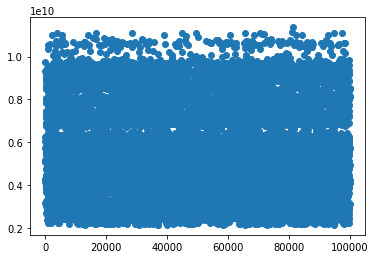

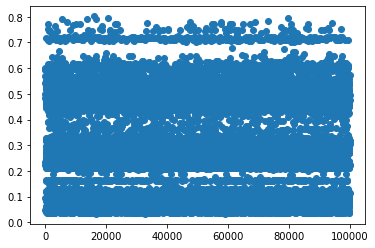

In [58]:
plt.scatter(actual_used_bytes.index, actual_used_bytes)
plt.show()
plt.scatter(actual_used_pct.index, actual_used_pct)
plt.show()

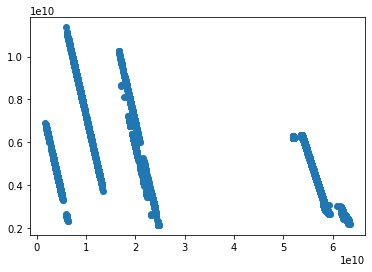

In [60]:
plt.scatter(free, actual_used_bytes)
plt.show()

In [5]:
data_host

0              {'name': 'DEVELOP'}
1             {'name': 'QASERVER'}
2           {'name': 'PRODUCCION'}
3              {'name': 'DEVELOP'}
4           {'name': 'PRODUCCION'}
                   ...            
99995    {'name': 'PREPRODUCCION'}
99996          {'name': 'PRUEBAS'}
99997    {'name': 'PREPRODUCCION'}
99998    {'name': 'PREPRODUCCION'}
99999          {'name': 'PRUEBAS'}
Name: host, Length: 100000, dtype: object

In [4]:
def find_string(string, obj):
    # finds string in object
    return string in obj